# 1 - How do UMIs help with mapping the reads?

In [1]:
import pysam
import numpy as np
import cPickle as pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
from IPython.display import Image

In [ ]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_AAAACT.bam","rb")

In [ ]:
st.reset()
reads = st.fetch(until_eof=True)

In [ ]:
u_reads = []
m_reads = []
unmapped = []
for r in reads:
    if r.is_unmapped:
        unmapped.append(r.query_name)
    else:
        if r.get_tag('NH') == 1:
            u_reads.append(r.query_name)
        else:
            m_reads.append(r.query_name)
            
uniques = len(np.unique(u_reads))
multis = len(np.unique(m_reads))
unmaps = len(np.unique(unmapped))

In [ ]:
labels = "unmapped", "unique reads", "multi reads"
fig = plt.figure(figsize=(10,10))
fig.suptitle('Sample AAAACT', fontsize=13, fontweight='bold')
plt.pie([unmaps,uniques,multis], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('mapping_pie.png')

## What is already there?

In [9]:
Image(filename='mapping_pie.png', alignment='center')

TypeError: __init__() got an unexpected keyword argument 'alignment'

## 1 - 1 What could be saved by UMIs? (in combination with gene/coordinate information)

   ### *Total number of multi reads with strong associations:                         56,543*

   ### *Fraction of all multi reads:                                                       2.4%*

   ### *Total number of mappings of multi reads with strong associations:               281,363*

   ### *Fraction of all mappings of multi reads:                                           2.0%*

## Why so few?! 

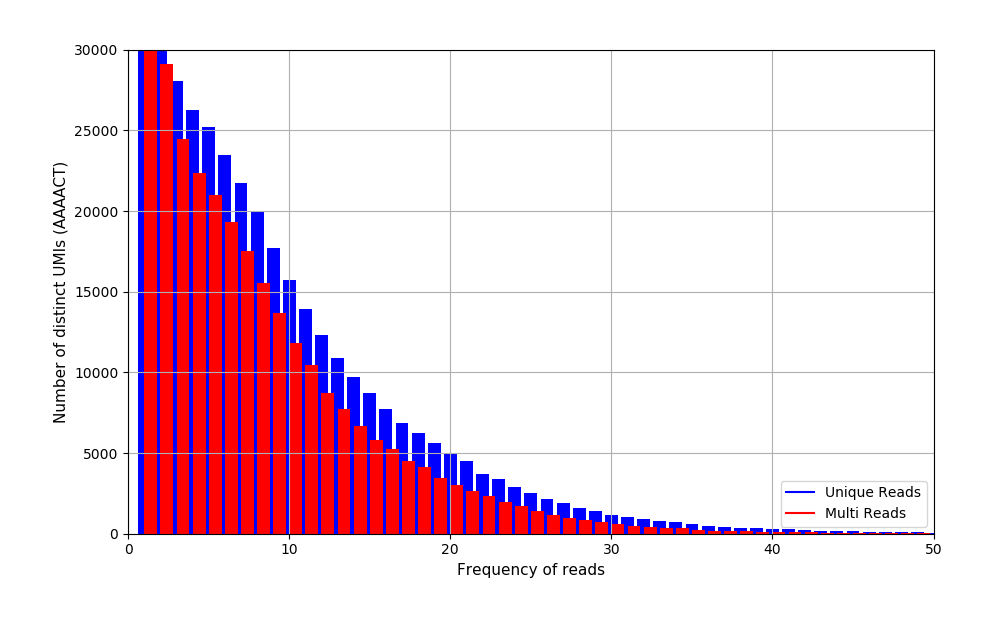

In [12]:
Image(filename='UMI_dist.png')

## How are reads sampled (roughly)?

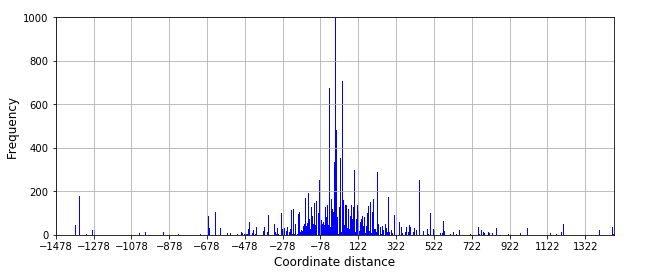

In [11]:
Image(filename='sampling_shape.png')

### *Let's see how this can help...* 

-----------------------------

## 1 - 2  More to mapping quality: number of mismatches

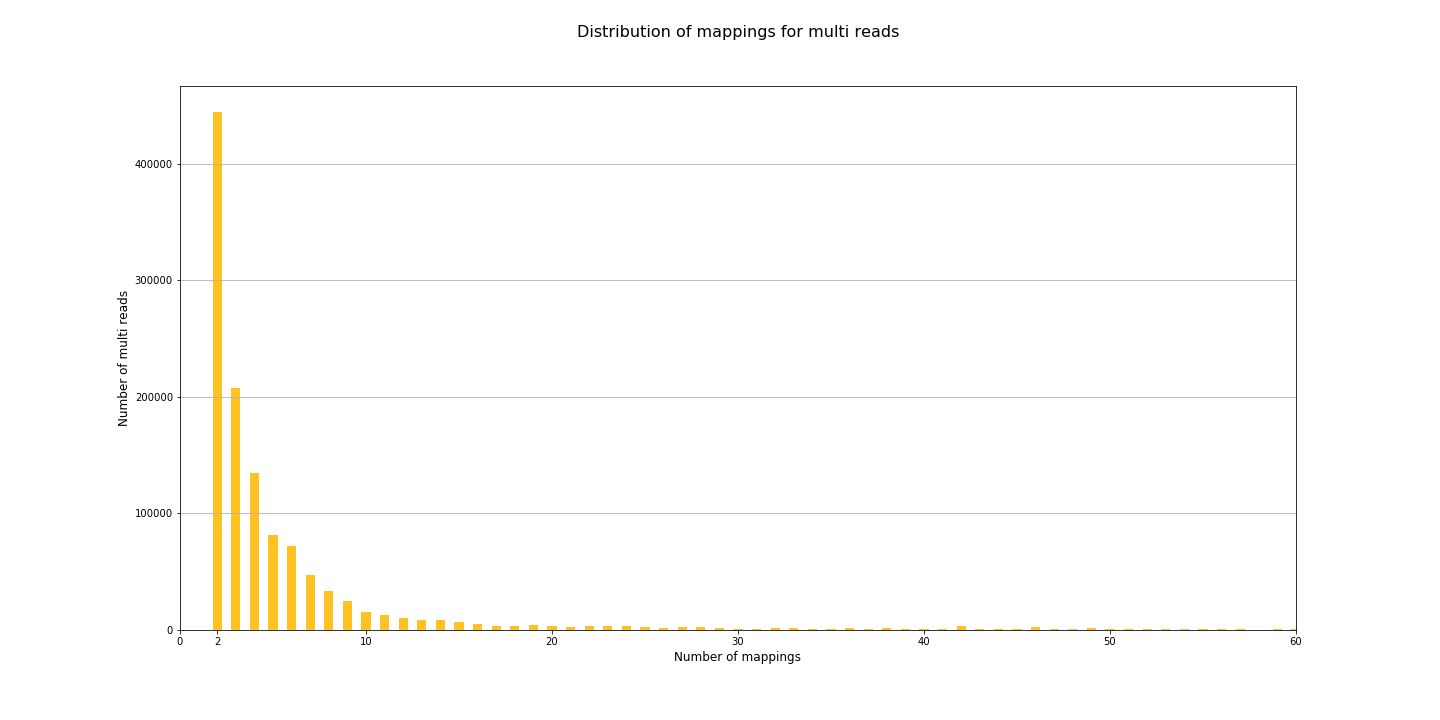

In [13]:
Image(filename='mapping_dist.png')

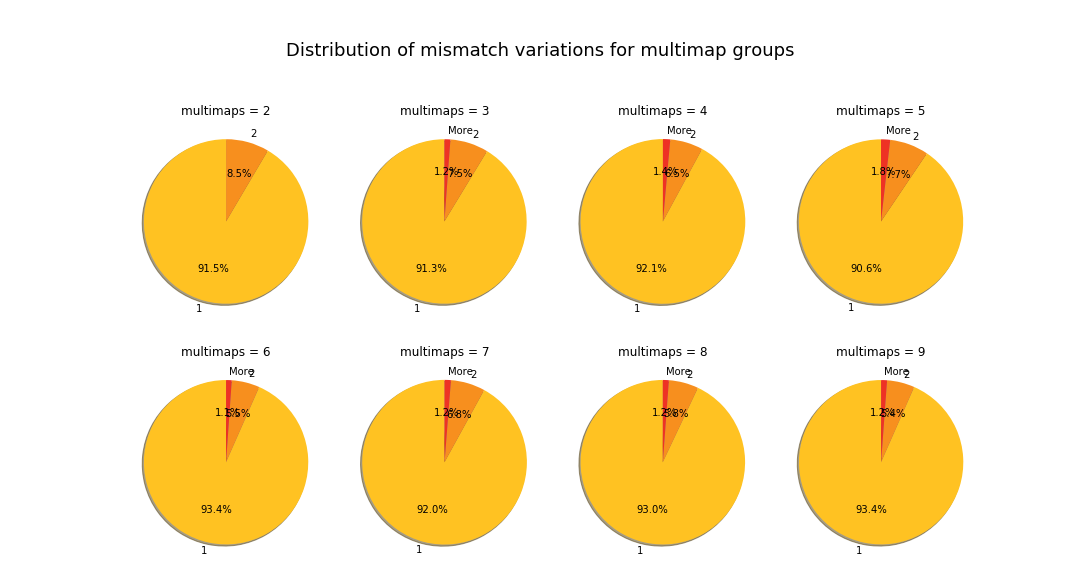

In [14]:
Image(filename='mm_dist1.png')

### *Genes, psuedo-genes, and repeat families?* 

-------------------------

# 1 - Back to the genes..

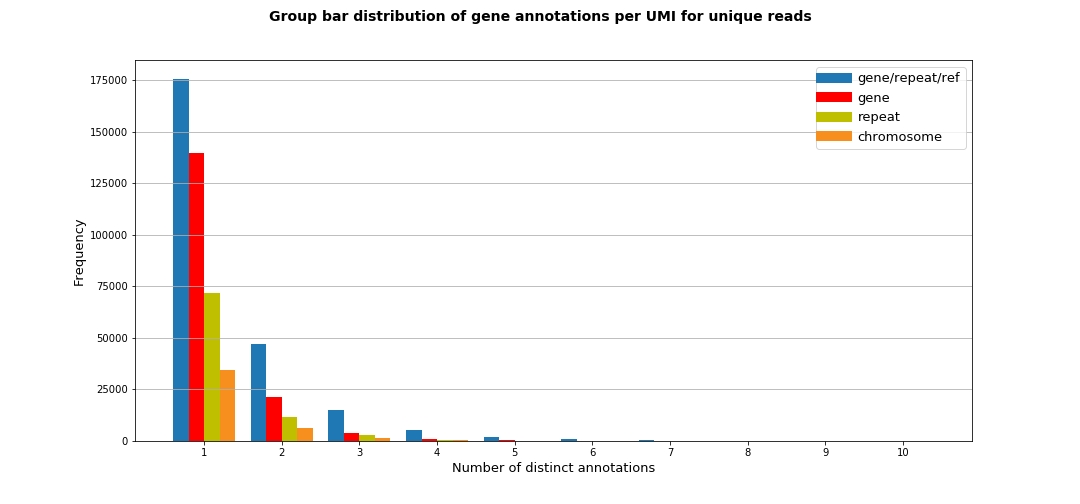

In [15]:
Image(filename='UMI_gdist_uniq.png')

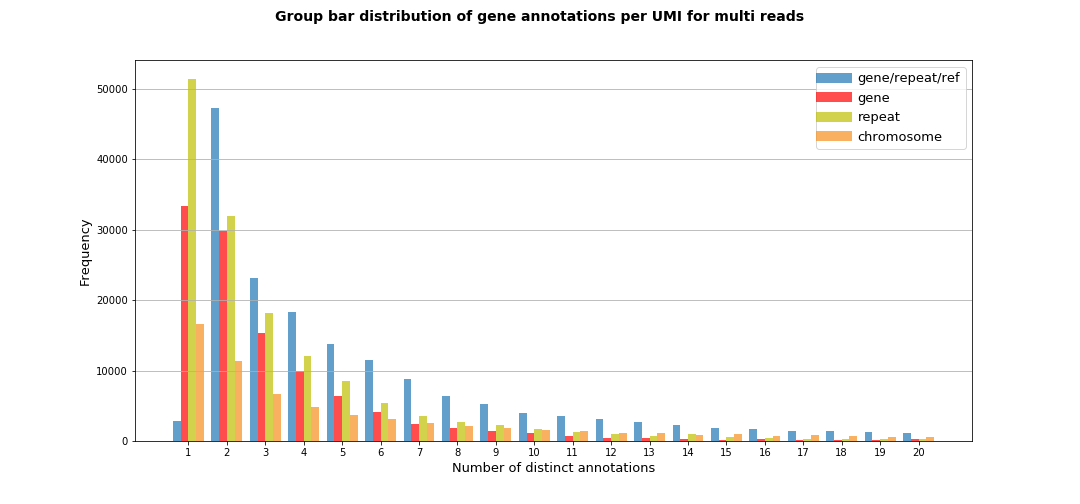

In [16]:
Image(filename='UMI_gdist_multi.png')